<a href="https://colab.research.google.com/github/Mahmudah25/uas-data-science/blob/main/UAS_DATA_SCIENCE_KEL_8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
df.shape

(5377, 17)

In [ ]:
df.isnull().sum()

,0
rank,0
city,0
city_name,0
Country,0
avg,0
jan,0
feb,0
mar,0
apr,0
may,0


In [ ]:
# ==== Parameter ====
RANDOM_STATE = 2023
TEST_SIZE = 0.3
RUN_HYPERPARAMETER_SEARCH = False  # Ganti True kalau mau cari parameter terbaik


# **EDA**

Text(0.5, 1.0, 'Distribusi Kategori Polusi Udara')

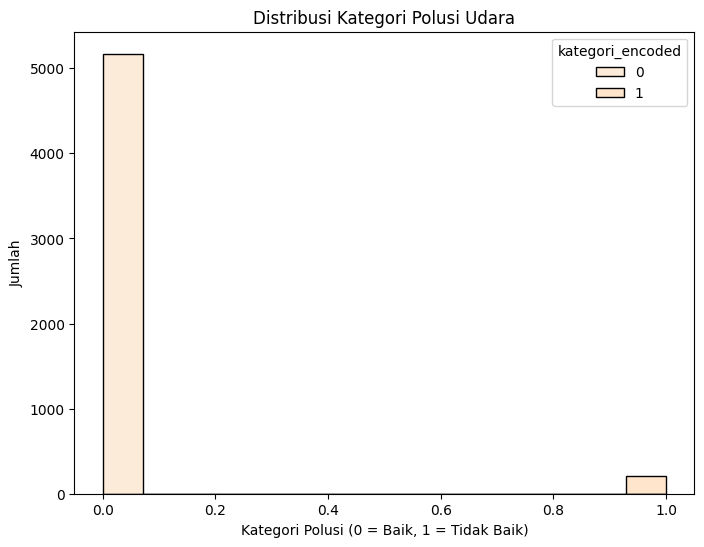

In [ ]:
df['kategori_encoded'] = df['avg'].apply(lambda x: 0 if x < 100 else 1)

# Plot histogram kategori_encoded
plt.figure(figsize=(8, 6))
ax = sns.histplot(x='kategori_encoded', data=df, hue='kategori_encoded', palette=['#fdd9b5', '#ffcc99'])

# Label dan judul
plt.xlabel("Kategori Polusi (0 = Baik, 1 = Tidak Baik)")
plt.ylabel("Jumlah")
plt.title("Distribusi Kategori Polusi Udara")

In [ ]:
# Load dataset
df = pd.read_csv('cleaned_interpolated_dataset.csv')
df.head()

,rank,city,city_name,Country,avg,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1,"Begusarai, India",Begusarai,India,223,413.0,337.0,250.0,258.0,209.0,205.0,131.0,115.0,100.0,114.0,298.0,249.0
1,2,"Patna, India",Patna,India,212,354.0,297.0,225.0,230.0,169.0,183.0,82.0,100.0,84.0,136.0,402.0,277.0
2,3,"Saharsa, India",Saharsa,India,207,418.0,344.0,238.0,220.0,167.0,149.0,85.0,93.0,91.0,110.0,282.0,292.0
3,4,"New Delhi, India",New Delhi,India,205,325.0,244.0,167.0,181.0,175.0,124.0,70.0,110.0,91.0,210.0,405.0,352.0
4,5,"Noida, India",Noida,India,201,304.0,212.0,154.0,187.0,176.0,129.0,70.0,125.0,118.0,237.0,367.0,338.0


In [ ]:
# 1. Info dasar
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377 entries, 0 to 5376
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5377 non-null   int64  
 1   city              5377 non-null   object 
 2   city_name         5377 non-null   object 
 3   Country           5377 non-null   object 
 4   avg               5377 non-null   int64  
 5   jan               5377 non-null   float64
 6   feb               5377 non-null   float64
 7   mar               5377 non-null   float64
 8   apr               5377 non-null   float64
 9   may               5377 non-null   float64
 10  jun               5377 non-null   float64
 11  jul               5377 non-null   float64
 12  aug               5377 non-null   float64
 13  sep               5377 non-null   float64
 14  oct               5377 non-null   float64
 15  nov               5377 non-null   float64
 16  dec               5377 non-null   float64


In [ ]:
print(df.describe())

             rank          avg          jan          feb          mar  \
count  5377.00000  5377.000000  5377.000000  5377.000000  5377.000000   
mean   2689.00000    32.171657    41.192672    39.521666    37.567975   
std    1552.35053    27.075191    50.722256    40.604397    36.867418   
min       1.00000     1.000000     0.000000     0.000000     0.000000   
25%    1345.00000    16.000000    14.000000    16.000000    16.000000   
50%    2689.00000    26.000000    22.000000    26.000000    27.000000   
75%    4033.00000    37.000000    45.000000    46.000000    41.000000   
max    5377.00000   223.000000   418.000000   344.000000   534.000000   

               apr          may          jun          jul          aug  \
count  5377.000000  5377.000000  5377.000000  5377.000000  5377.000000   
mean     35.700855    30.650084    29.951460    25.677143    26.132602   
std      33.975007    23.099055    21.807634    19.463275    21.858163   
min       0.000000     0.000000     0.000000  

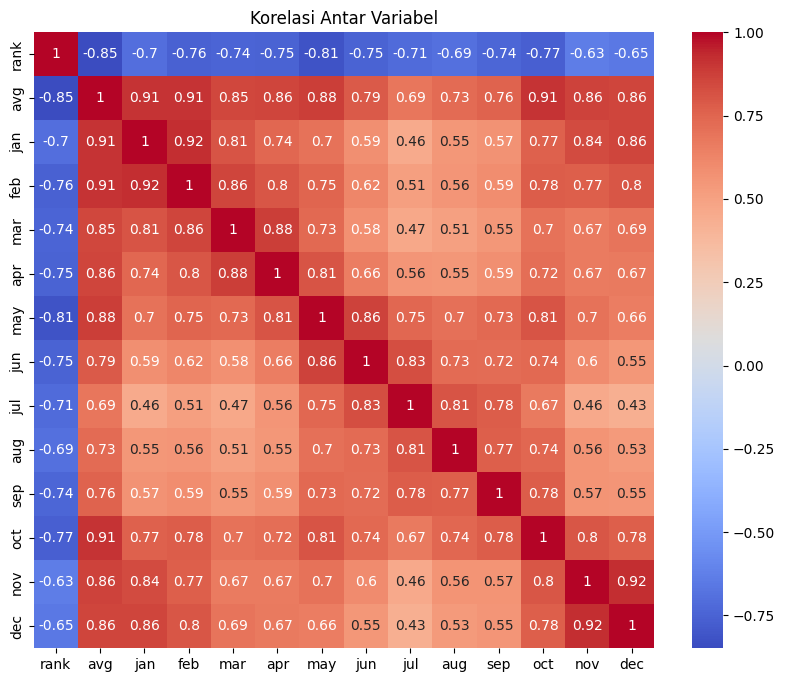

In [ ]:
# 3. Korelasi antar kolom numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel')
plt.show()

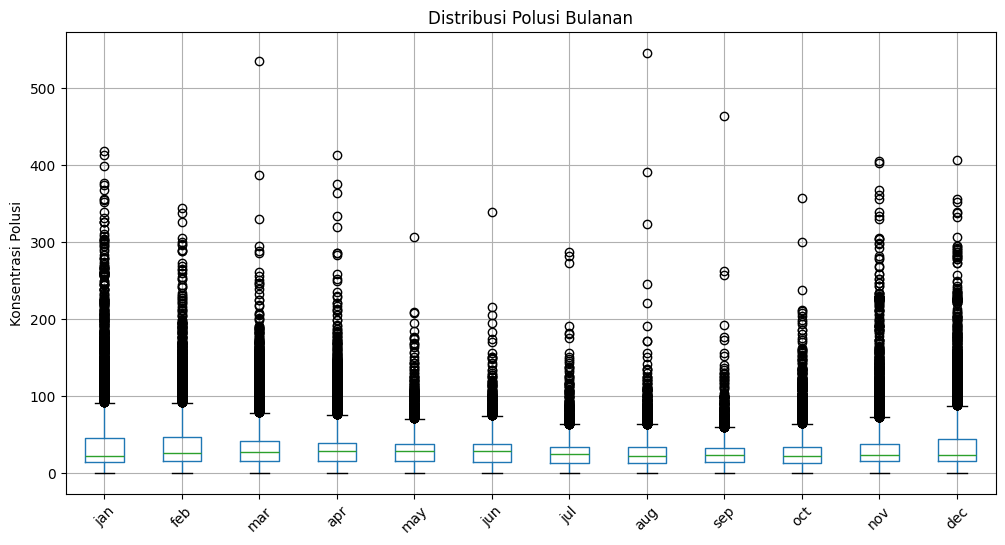

In [ ]:
# 4. Boxplot untuk deteksi outlier per bulan
bulan = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
plt.figure(figsize=(12, 6))
df[bulan].boxplot()
plt.title('Distribusi Polusi Bulanan')
plt.xticks(rotation=45)
plt.ylabel('Konsentrasi Polusi')
plt.show()

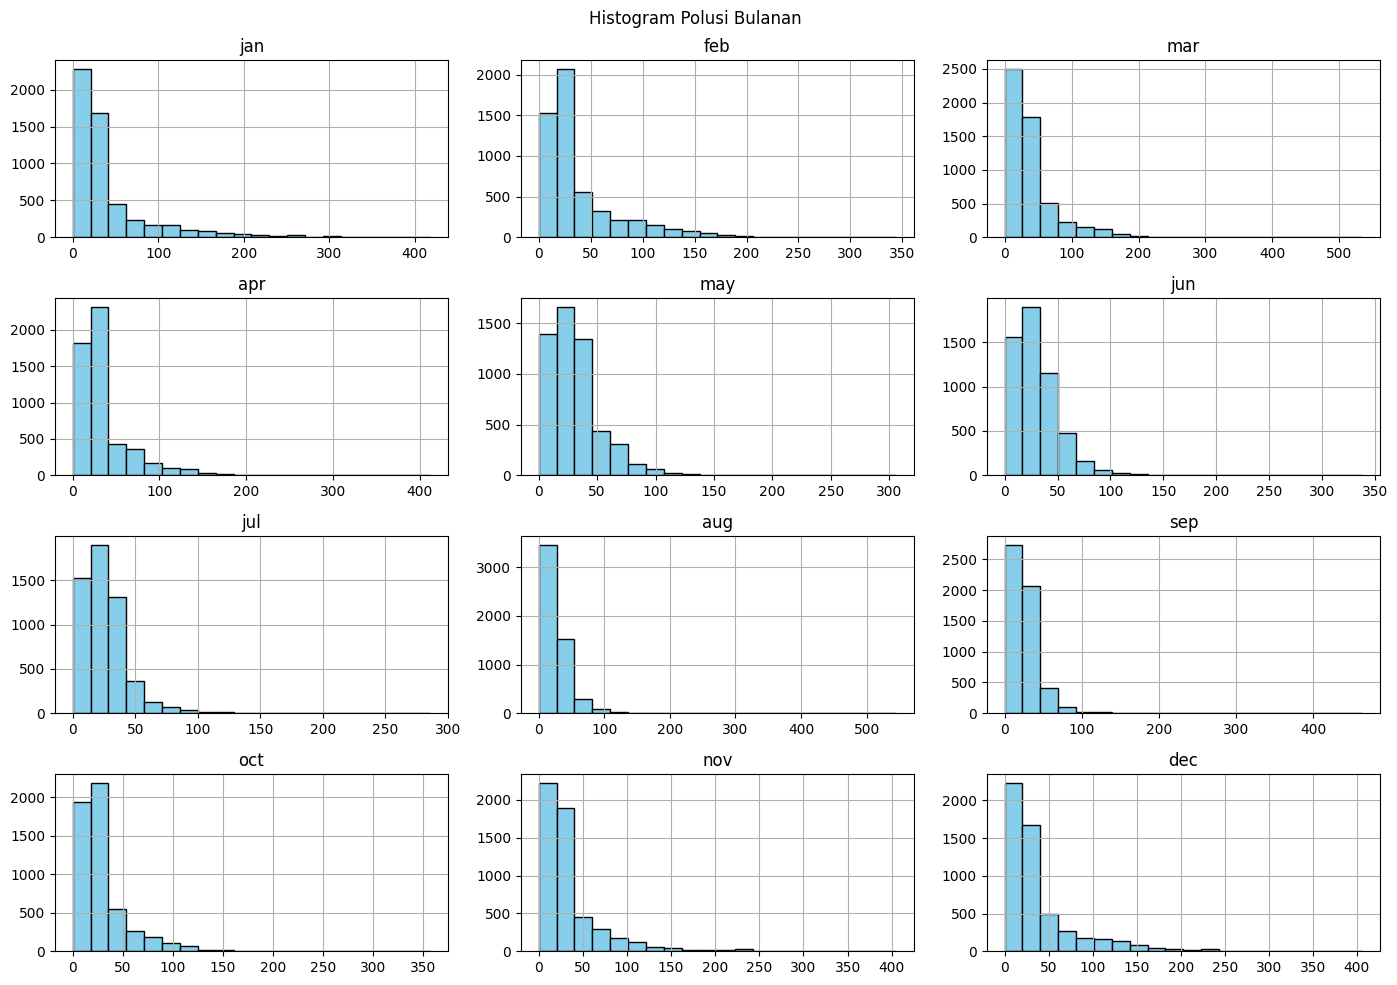

In [ ]:
# 5. Histogram tiap bulan
df[bulan].hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histogram Polusi Bulanan')
plt.tight_layout()
plt.show()

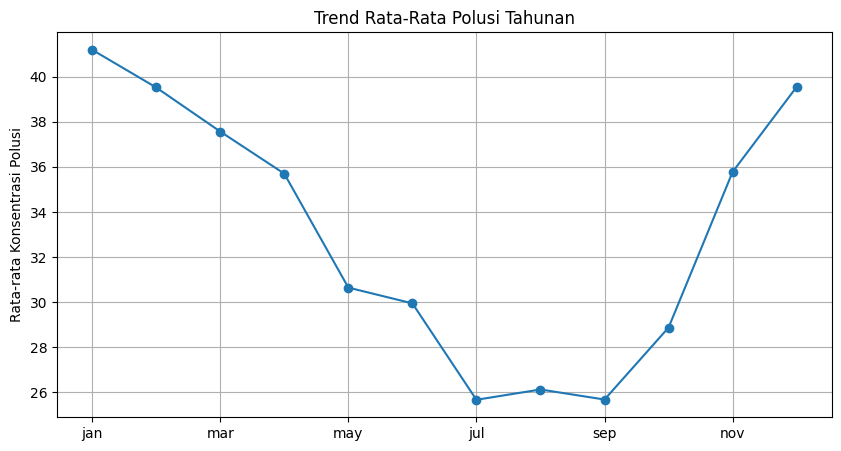

In [ ]:
# 6. Rata-rata polusi per bulan (trend)
avg_per_bulan = df[bulan].mean()
plt.figure(figsize=(10, 5))
avg_per_bulan.plot(marker='o')
plt.title("Trend Rata-Rata Polusi Tahunan")
plt.ylabel("Rata-rata Konsentrasi Polusi")
plt.grid(True)
plt.show()

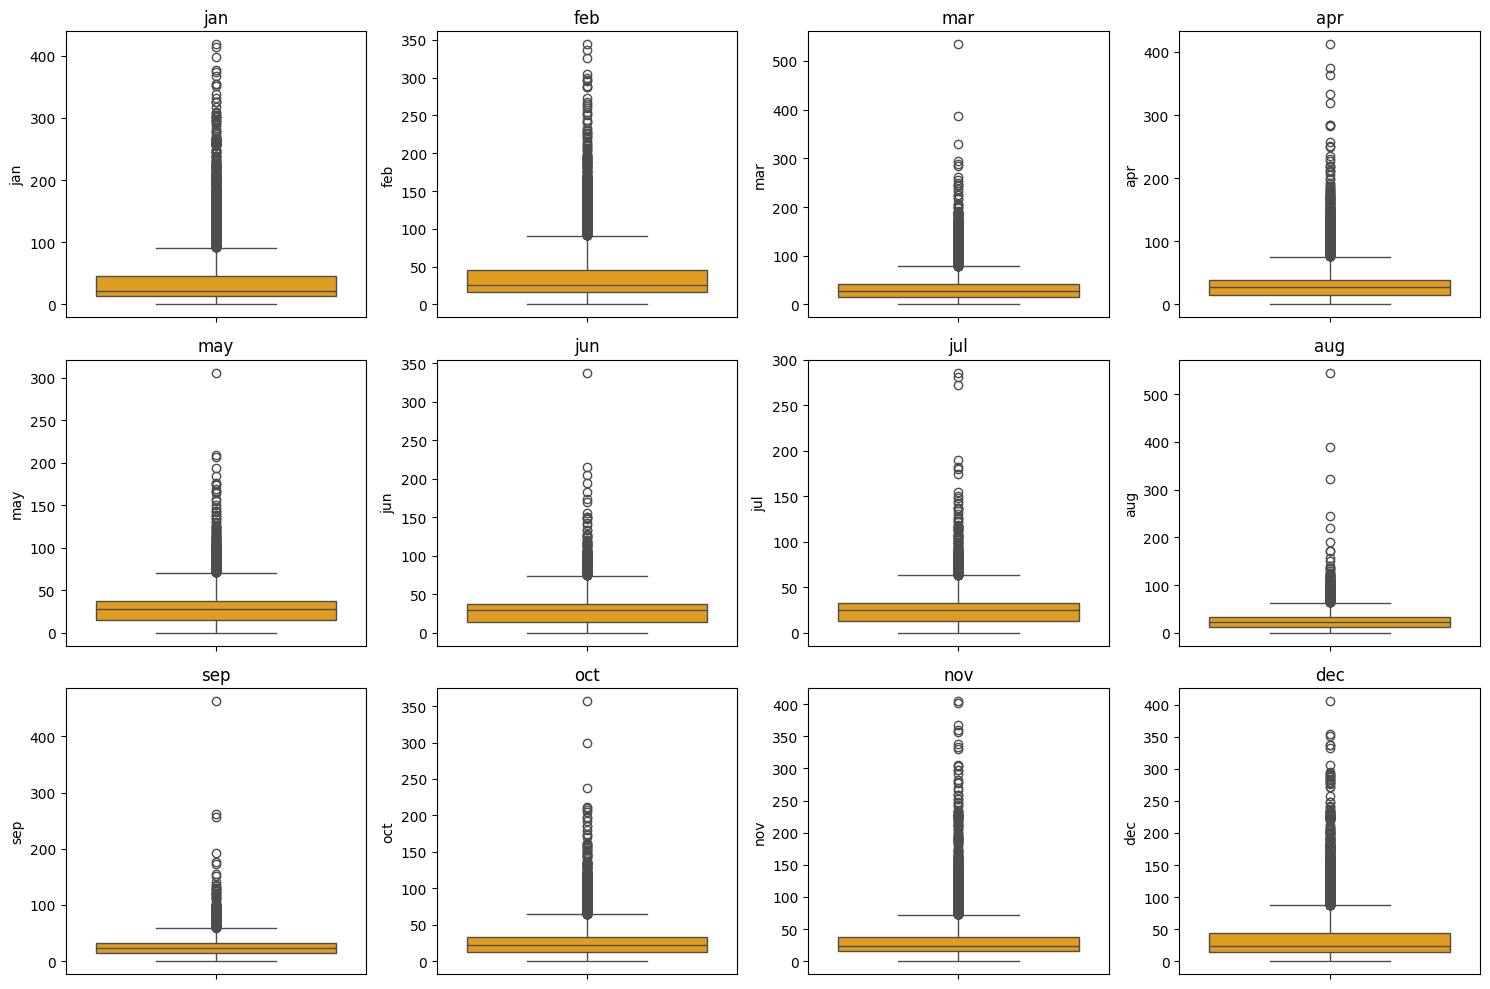

In [ ]:
# 7. Deteksi outlier per bulan (per subplot)
plt.figure(figsize=(15, 10))
for i, col in enumerate(bulan):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

# **DATA PREPROCESSING**


In [ ]:
bulan = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
X = df[bulan]

In [ ]:
#outlier pada feature Income, CCAvg, Mortgage
deskripsi_data= df.describe(percentiles = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]).T
deskripsi_data

,count,mean,std,min,1%,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,max
rank,5377.0,2689.000000,1552.350530,1.0,54.760000,538.60,1076.20,1613.800000,2151.4,2689.0,3226.6,3764.2,4301.8,4839.4,5323.24,5377.0
avg,5377.0,32.171657,27.075191,1.0,1.000000,7.00,13.00,18.000000,23.0,26.0,28.0,32.0,45.0,69.0,121.00,223.0
jan,5377.0,41.192672,50.722256,0.0,0.500000,7.00,12.00,17.000000,20.0,22.0,26.0,34.2,56.4,107.0,257.00,418.0
feb,5377.0,39.521666,40.604397,0.0,0.226813,7.00,13.00,18.633333,23.0,26.0,29.0,38.0,58.0,95.0,189.00,344.0
mar,5377.0,37.567975,36.867418,0.0,0.777143,7.00,13.00,19.160000,24.0,27.0,30.0,35.0,54.0,83.4,169.24,534.0
apr,5377.0,35.700855,33.975007,0.0,0.538416,6.00,12.50,18.000000,24.0,28.0,32.0,36.0,49.0,74.0,159.48,412.0
may,5377.0,30.650084,23.099055,0.0,0.256129,6.00,12.00,18.000000,24.0,28.0,31.0,34.0,44.0,62.0,107.00,306.0
jun,5377.0,29.951460,21.807634,0.0,0.396308,5.56,11.00,17.000000,24.0,29.0,32.0,36.0,42.0,57.0,101.00,338.0
jul,5377.0,25.677143,19.463275,0.0,0.245385,5.00,10.00,15.466667,21.0,25.0,27.0,31.0,35.0,46.0,93.00,286.0
aug,5377.0,26.132602,21.858163,0.0,0.282597,6.00,11.00,16.000000,19.0,22.0,26.0,30.0,36.0,49.0,98.24,545.0


In [ ]:
deskripsi_data.to_excel('deskripsi_data.xlsx', index = True)

In [ ]:
print(df.columns)


Index(['rank', 'city', 'city_name', 'Country', 'avg', 'jan', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec',
       'kategori', 'kategori_encoded'],
      dtype='object')


In [ ]:
upper_limit_avg = df['avg'].quantile(0.99)
lower_limit_avg = df['avg'].quantile(0.02)

print('Upper limit avg:', upper_limit_avg)
print('Lower limit avg:', lower_limit_avg)

Upper limit avg: 121.0
Lower limit avg: 2.0


In [ ]:
# Filter data tanpa outlier
df_cleaned = df[(df['avg'] >= lower_limit_avg) & (df['avg'] <= upper_limit_avg)]

print(f'Data awal: {df.shape[0]} baris')
print(f'Data setelah dibersihkan: {df_cleaned.shape[0]} baris')

Data awal: 5377 baris
Data setelah dibersihkan: 5256 baris


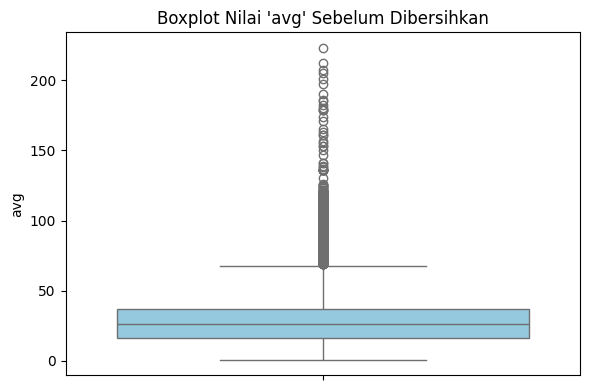

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(data=df['avg'], color='skyblue')
plt.title("Boxplot Nilai 'avg' Sebelum Dibersihkan")
plt.tight_layout()
plt.show()


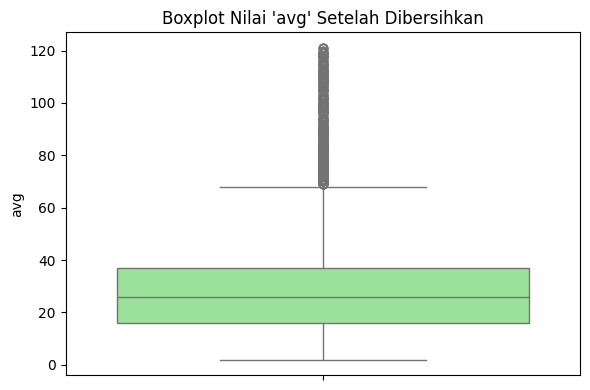

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_cleaned['avg'], color='lightgreen')
plt.title("Boxplot Nilai 'avg' Setelah Dibersihkan")
plt.tight_layout()
plt.show()

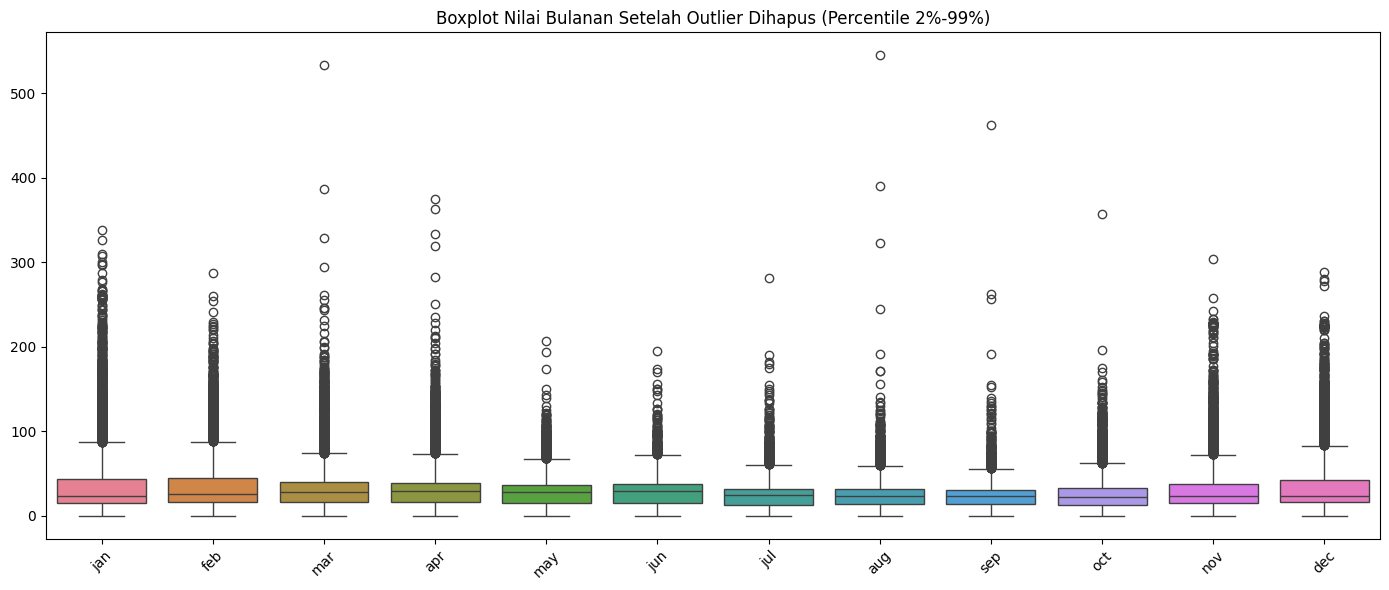

In [ ]:
# Tampilkan boxplot setelah bersih
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_cleaned[bulan])
plt.title("Boxplot Nilai Bulanan Setelah Outlier Dihapus (Percentile 2%-99%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

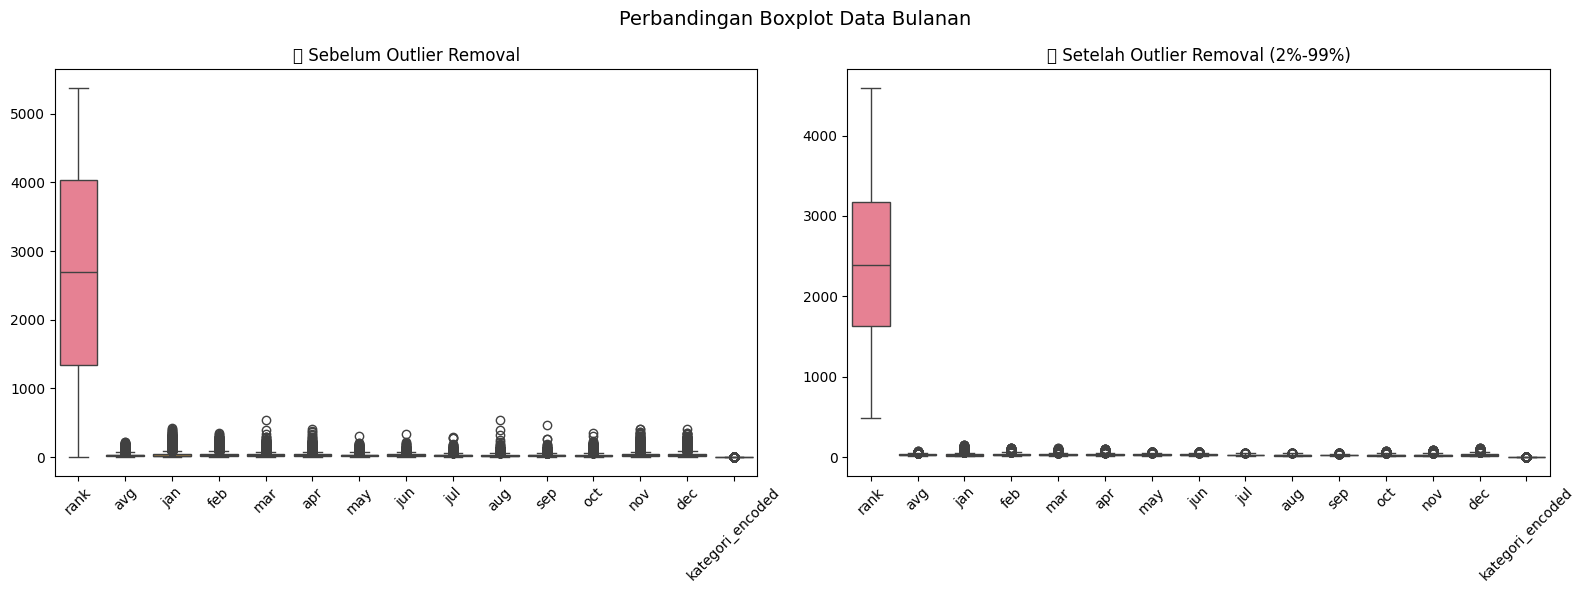

In [ ]:
# Bersihkan outlier (percentile 2%-99%)
for col in bulan:
    upper = df_cleaned[col].quantile(0.99)
    lower = df_cleaned[col].quantile(0.02)
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]

# Visualisasi perbandingan
plt.figure(figsize=(16, 6))

# Boxplot sebelum
plt.subplot(1, 2, 1)
sns.boxplot(data=df)
plt.title("❌ Sebelum Outlier Removal")
plt.xticks(rotation=45)

# Boxplot sesudah
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned)
plt.title("✅ Setelah Outlier Removal (2%-99%)")
plt.xticks(rotation=45)

plt.suptitle("Perbandingan Boxplot Data Bulanan", fontsize=14)
plt.tight_layout()
plt.show()

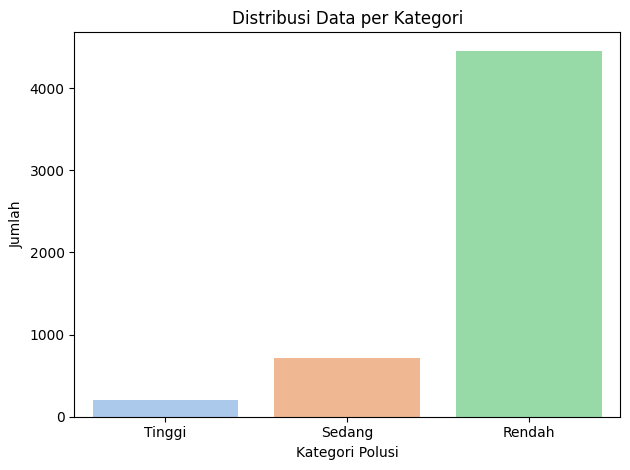

In [ ]:

# Visualisasi distribusi
sns.countplot(x='kategori', data=df, palette='pastel')
plt.title("Distribusi Data per Kategori")
plt.xlabel("Kategori Polusi")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

In [ ]:
# Fitur dan target
bulan = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
X = df[bulan]
y = df['kategori_encoded']
# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (stratify agar distribusi tetap)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=2023)

# SMOTE
smote = SMOTE(random_state=2023)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)



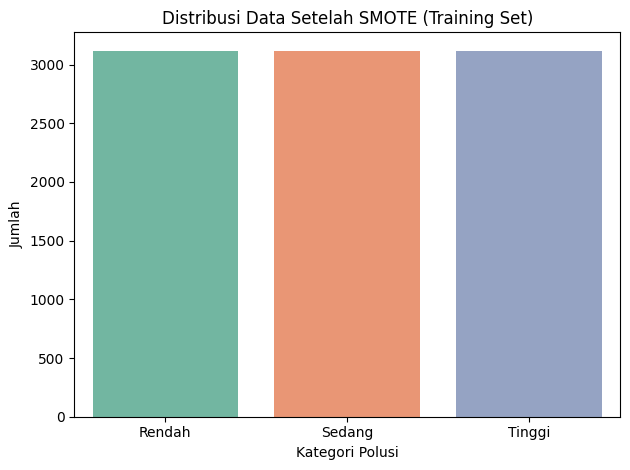

In [ ]:
import numpy as np

label_map_reverse = {0: 'Rendah', 1: 'Sedang', 2: 'Tinggi'}
y_balanced_label = pd.Series(y_train_balanced).map(label_map_reverse)

sns.countplot(x=y_balanced_label, palette='Set2')
plt.title("Distribusi Data Setelah SMOTE (Training Set)")
plt.xlabel("Kategori Polusi")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()


In [ ]:
selected_features =['jan',
                    'feb',
                    'mar',
                    'apr',
                    'may',
                    'jun',
                    'jul',
                    'aug',
                    'sep',
                    'oct',
                    'nov',
                    'dec']

selected_data = df[selected_features]
selected_data.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,413.0,337.0,250.0,258.0,209.0,205.0,131.0,115.0,100.0,114.0,298.0,249.0
1,354.0,297.0,225.0,230.0,169.0,183.0,82.0,100.0,84.0,136.0,402.0,277.0
2,418.0,344.0,238.0,220.0,167.0,149.0,85.0,93.0,91.0,110.0,282.0,292.0
3,325.0,244.0,167.0,181.0,175.0,124.0,70.0,110.0,91.0,210.0,405.0,352.0
4,304.0,212.0,154.0,187.0,176.0,129.0,70.0,125.0,118.0,237.0,367.0,338.0


In [ ]:
# Belum Normalisasi
X = selected_data.iloc[:,:-1]
y = df['avg']

In [ ]:
X

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov
0,413.0,337.0,250.000000,258.000000,209.000000,205.000000,131.0,115.000000,100.000000,114.000000,298.0
1,354.0,297.0,225.000000,230.000000,169.000000,183.000000,82.0,100.000000,84.000000,136.000000,402.0
2,418.0,344.0,238.000000,220.000000,167.000000,149.000000,85.0,93.000000,91.000000,110.000000,282.0
3,325.0,244.0,167.000000,181.000000,175.000000,124.000000,70.0,110.000000,91.000000,210.000000,405.0
4,304.0,212.0,154.000000,187.000000,176.000000,129.000000,70.0,125.000000,118.000000,237.000000,367.0
...,...,...,...,...,...,...,...,...,...,...,...
5372,2.5,6.5,0.928571,3.714286,0.000000,0.000000,0.0,0.000000,0.000000,0.764706,7.0
5373,4.0,7.0,1.000000,4.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.823529,0.0
5374,3.0,5.0,1.000000,2.666667,0.333333,0.333333,0.0,0.333333,0.333333,0.882353,6.0
5375,2.0,3.0,1.000000,1.333333,0.666667,0.666667,0.0,0.666667,0.666667,0.941176,6.0


# MODELING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi dan latih model
model = RandomForestClassifier(random_state=2023)
model.fit(X_train_balanced, y_train_balanced)

# Prediksi pada data test
y_pred = model.predict(X_test)


Akurasi: 0.98

Classification Report:
              precision    recall  f1-score   support

      Rendah       1.00      0.99      0.99      1337
      Sedang       0.90      0.97      0.93       215
      Tinggi       0.97      0.92      0.94        62

    accuracy                           0.98      1614
   macro avg       0.95      0.96      0.96      1614
weighted avg       0.98      0.98      0.98      1614



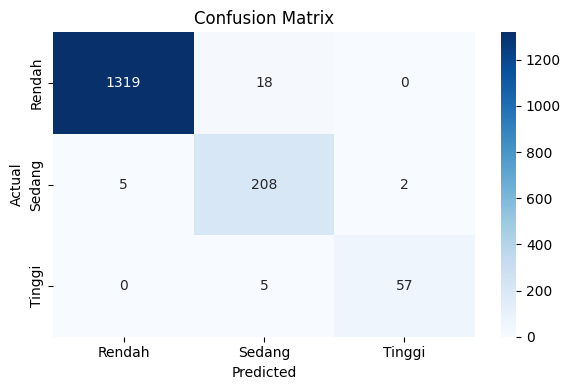

In [ ]:
# Akurasi
acc = accuracy_score(y_test, y_pred)
print(f'Akurasi: {acc:.2f}')

# Laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Rendah', 'Sedang', 'Tinggi']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rendah', 'Sedang', 'Tinggi'], yticklabels=['Rendah', 'Sedang', 'Tinggi'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Latih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=2023, max_depth=5)
dt_model.fit(X_train_balanced, y_train_balanced)

# Prediksi data uji
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Latih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=2023, max_depth=5)
dt_model.fit(X_train_balanced, y_train_balanced)

# Prediksi data uji
y_pred_dt = dt_model.predict(X_test)

Akurasi Decision Tree: 0.95

Classification Report:
              precision    recall  f1-score   support

      Rendah       1.00      0.95      0.97      1337
      Sedang       0.73      0.95      0.82       215
      Tinggi       0.90      0.89      0.89        62

    accuracy                           0.95      1614
   macro avg       0.88      0.93      0.90      1614
weighted avg       0.96      0.95      0.95      1614



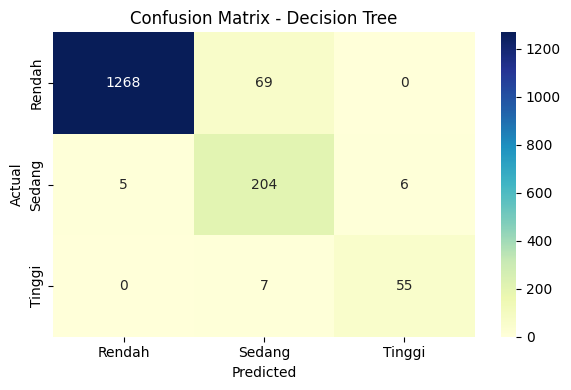

In [ ]:
# Akurasi
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f'Akurasi Decision Tree: {acc_dt:.2f}')

# Laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Rendah', 'Sedang', 'Tinggi']))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Rendah', 'Sedang', 'Tinggi'],
            yticklabels=['Rendah', 'Sedang', 'Tinggi'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


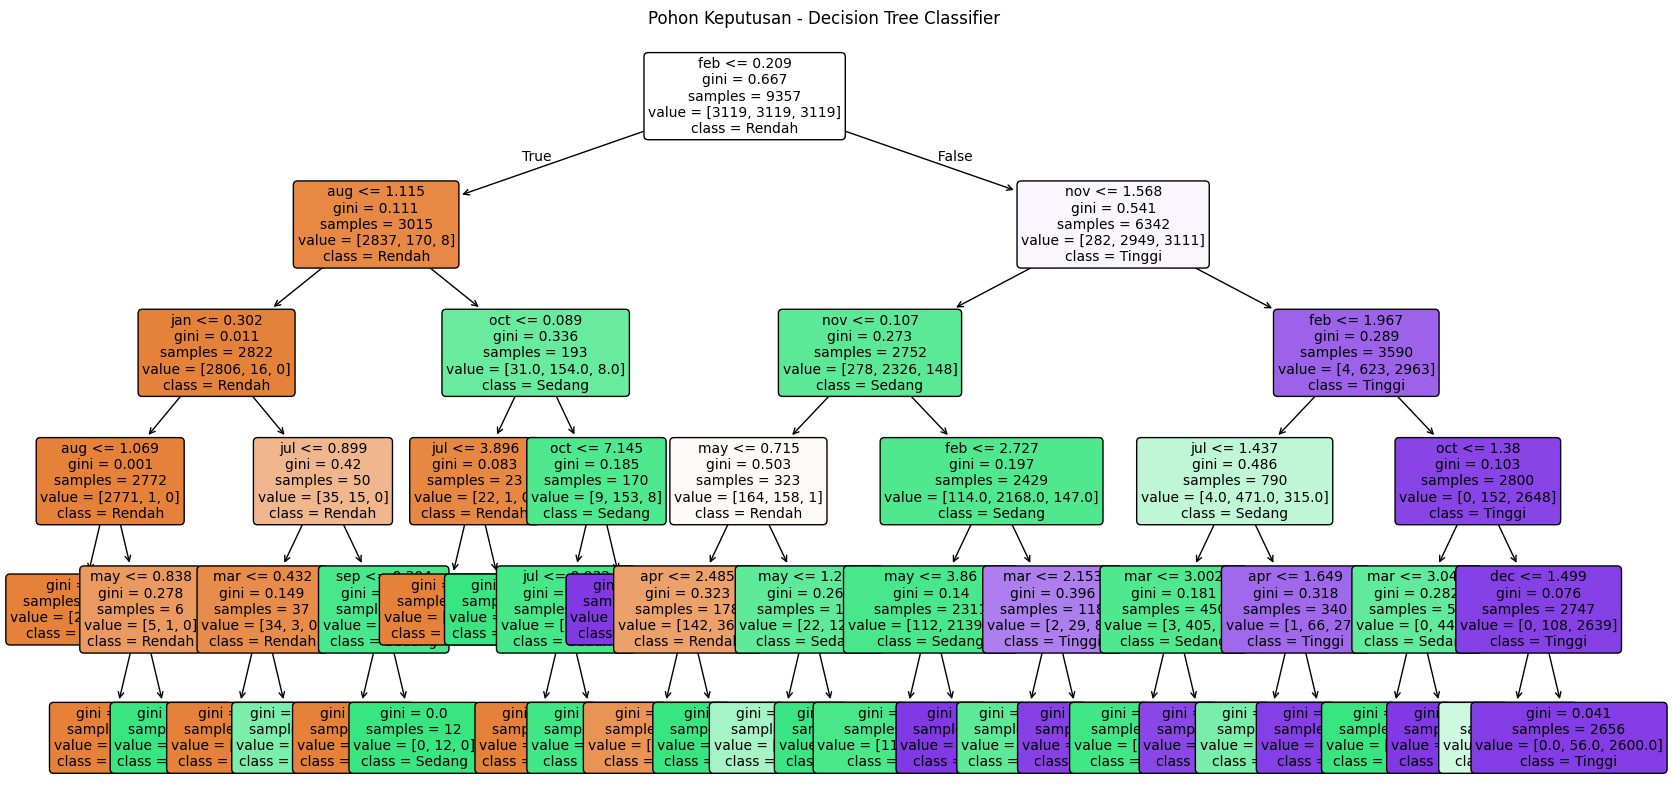

In [ ]:
from sklearn import tree
# Visualisasi pohon
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model,
               feature_names=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
               class_names=['Rendah', 'Sedang', 'Tinggi'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title("Pohon Keputusan - Decision Tree Classifier")
plt.show()

# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=2023)
rf_model.fit(X_train_balanced, y_train_balanced)

# Prediksi
y_pred_rf = rf_model.predict(X_test)


Akurasi Random Forest: 0.98

Classification Report:
              precision    recall  f1-score   support

      Rendah       1.00      0.99      0.99      1337
      Sedang       0.90      0.97      0.93       215
      Tinggi       0.97      0.92      0.94        62

    accuracy                           0.98      1614
   macro avg       0.95      0.96      0.96      1614
weighted avg       0.98      0.98      0.98      1614



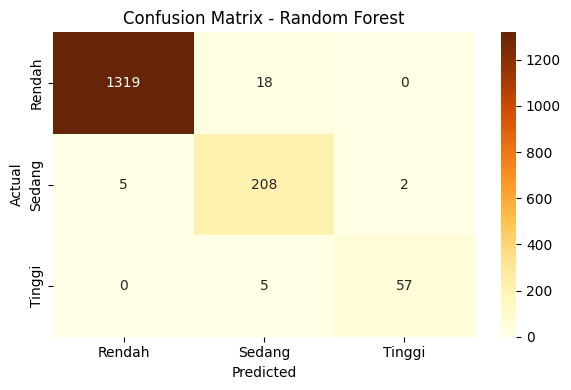

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Akurasi
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Random Forest: {acc_rf:.2f}")

# Laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Rendah', 'Sedang', 'Tinggi']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['Rendah', 'Sedang', 'Tinggi'],
            yticklabels=['Rendah', 'Sedang', 'Tinggi'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Prediksi dengan model
y_pred_rf = rf_model.predict(X_test)

# Buat DataFrame dari hasil prediksi
hasil_prediksi = pd.DataFrame({'Prediksi': y_pred_rf})

# Hitung jumlah dan persentase masing-masing kelas
persentase = hasil_prediksi['Prediksi'].value_counts(normalize=True) * 100

# Ubah label angka ke teks (jika ingin)
label_mapping = {0: 'Rendah', 1: 'Sedang', 2: 'Tinggi'}
persentase.index = persentase.index.map(label_mapping)

# Tampilkan hasil
print("Presentase Hasil Prediksi Random Forest:")
print(persentase.round(2))


Presentase Hasil Prediksi Random Forest:
Prediksi
Rendah    82.03
Sedang    14.31
Tinggi     3.66
Name: proportion, dtype: float64


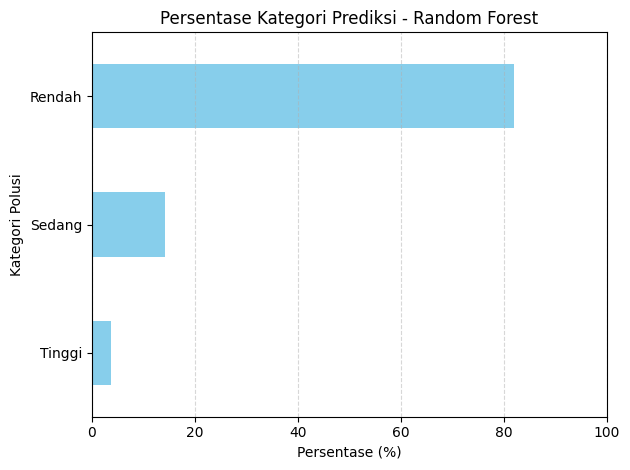

In [ ]:
import matplotlib.pyplot as plt

persentase.sort_values().plot(kind='barh', color='skyblue')
plt.title('Persentase Kategori Prediksi - Random Forest')
plt.xlabel('Persentase (%)')
plt.ylabel('Kategori Polusi')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


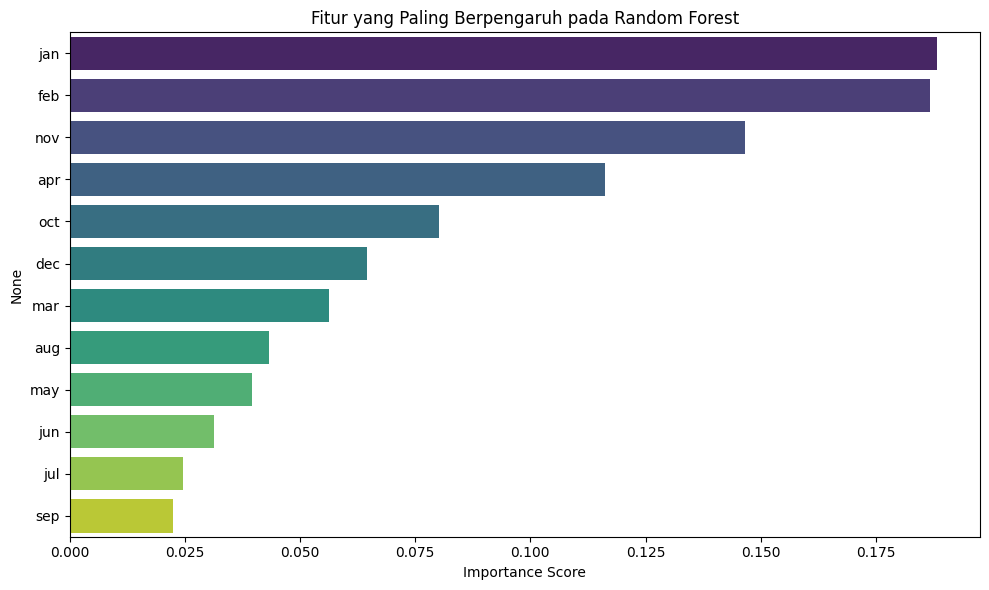

In [ ]:
import pandas as pd
import numpy as np

# Tampilkan fitur importance
feature_importance = pd.Series(rf_model.feature_importances_,
                               index=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

# Urutkan
feature_importance = feature_importance.sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Fitur yang Paling Berpengaruh pada Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
model_rf = RandomForestClassifier(n_estimators = 500,
                                  random_state = RANDOM_STATE)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=2023)

# xgboost

In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi dan latih model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=2023)
xgb_model.fit(X_train_balanced, y_train_balanced)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)


Akurasi XGBoost: 0.98

Classification Report:
              precision    recall  f1-score   support

      Rendah       1.00      0.99      0.99      1337
      Sedang       0.92      0.95      0.94       215
      Tinggi       0.92      0.95      0.94        62

    accuracy                           0.98      1614
   macro avg       0.95      0.96      0.96      1614
weighted avg       0.98      0.98      0.98      1614



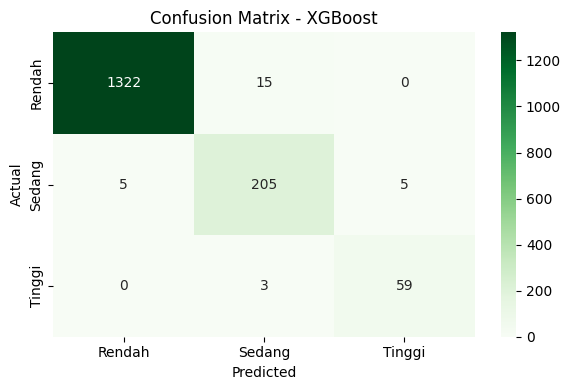

In [ ]:
# Akurasi
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Akurasi XGBoost: {acc_xgb:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Rendah', 'Sedang', 'Tinggi']))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Rendah', 'Sedang', 'Tinggi'],
            yticklabels=['Rendah', 'Sedang', 'Tinggi'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


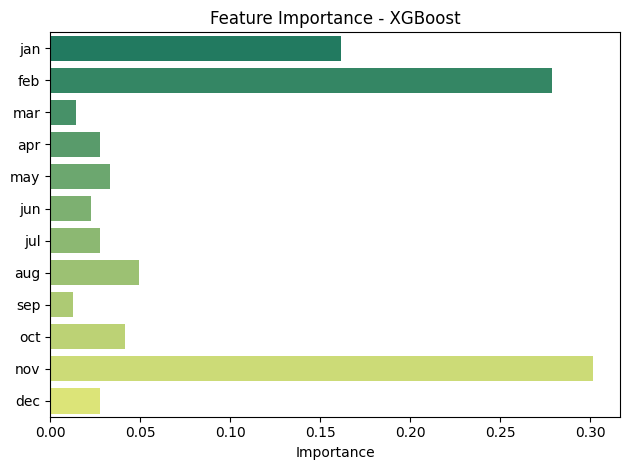

In [ ]:
# Visualisasi fitur yang paling penting
xgb_importance = xgb_model.feature_importances_
features = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

sns.barplot(x=xgb_importance, y=features, palette='summer')
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
